Authors: Minh Le, Huy Nguyen, Diep Le

Institution: Luther College

# import libs and dataset


In [ ]:
! pip install -q kaggle
from google.colab import files
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download imdevskp/corona-virus-report

 42% 8.00M/19.0M [00:00<00:00, 82.0MB/s]
100% 19.0M/19.0M [00:00<00:00, 132MB/s] 


In [ ]:
! mkdir /content/dataset
! mv /content/corona-virus-report.zip /content/dataset

In [ ]:
!unzip /content/dataset/corona-virus-report.zip -d /content/dataset/
!rm /content/dataset/corona-virus-report.zip

Archive:  /content/dataset/corona-virus-report.zip
  inflating: /content/dataset/country_wise_latest.csv  
  inflating: /content/dataset/covid_19_clean_complete.csv  
  inflating: /content/dataset/day_wise.csv  
  inflating: /content/dataset/full_grouped.csv  
  inflating: /content/dataset/usa_county_wise.csv  
  inflating: /content/dataset/worldometer_data.csv  


In [ ]:
!pip install pycountry
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

from pathlib import Path
data_dir = Path('/content/dataset')


import os
os.listdir(data_dir)

['country_wise_latest.csv',
 'worldometer_data.csv',
 'day_wise.csv',
 'covid_19_clean_complete.csv',
 'full_grouped.csv',
 'usa_county_wise.csv']

## TERM NOTATIONS:
1/ FIPS: FIPS codes, when referring to U.S. states and territories, are unique two-digit codes assigned to each state and territory for identification purposes. For Guam, the FIPS code is "66".

2/ iso2: ISO 3166-1 alpha-2 (often referred to as ISO2): This is a two-letter code that represents countries

3/ iso3: ISO 3166-1 alpha-3 (often referred to as ISO3): This is a three-letter code for countries

4/ code3: ISO 3166-1 numeric (or numeric-3) codes are three-digit numbers used to represent countries and areas

5/ UID: a numeric or alphanumeric string that is associated with a single entity within a given system

## CONVENTIONS:

dataframe(df) of 1 dataset would be named: "data_(name of dataset)"
e.g: data_full_grouped

# data mass transformation

*   turn datatype into 'category' or 'quantitative:{float64} or {int64}' or 'datetime'



In [ ]:
files=[]
names=[]
for i in os.listdir(data_dir):
  files.append(i)
  names.append(i[:-4])
print(names)
print(files)

['country_wise_latest', 'worldometer_data', 'day_wise', 'covid_19_clean_complete', 'full_grouped', 'usa_county_wise']
['country_wise_latest.csv', 'worldometer_data.csv', 'day_wise.csv', 'covid_19_clean_complete.csv', 'full_grouped.csv', 'usa_county_wise.csv']


In [ ]:
for i in range(len(names)):
  try: exec(f"data_{names[i]} = pd.read_csv(data_dir/files[i], parse_dates=['Date'])")
  except: exec(f"data_{names[i]} = pd.read_csv(data_dir/files[i])")

In [ ]:
for i in names:
  exec(f"cols_to_convert = data_{i}.select_dtypes(include='object').columns")
  exec(f"data_{i}[cols_to_convert]=data_{i}[cols_to_convert].astype('category')")

#special cases:
# TERM NOTATIONS:
# 1/ FIPS: FIPS codes, when referring to U.S. states and territories, are unique two-digit codes assigned to each state and territory for identification purposes. For Guam, the FIPS code is "66".
# 2/ iso2: ISO 3166-1 alpha-2 (often referred to as ISO2): This is a two-letter code that represents countries
# 3/ iso3: ISO 3166-1 alpha-3 (often referred to as ISO3): This is a three-letter code for countries
# 4/ code3: ISO 3166-1 numeric (or numeric-3) codes are three-digit numbers used to represent countries and areas
# 5/ UID: a numeric or alphanumeric string that is associated with a single entity within a given system

data_usa_county_wise["UID"] = data_usa_county_wise["UID"].astype('category')
data_usa_county_wise["code3"] = data_usa_county_wise["code3"].astype('category')
data_usa_county_wise["FIPS"] = data_usa_county_wise["FIPS"].astype('category')

In [ ]:
for i in names:
  print(i)
  exec(f'data_{i}.info()')
  print()

country_wise_latest
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Country/Region          187 non-null    category
 1   Confirmed               187 non-null    int64   
 2   Deaths                  187 non-null    int64   
 3   Recovered               187 non-null    int64   
 4   Active                  187 non-null    int64   
 5   New cases               187 non-null    int64   
 6   New deaths              187 non-null    int64   
 7   New recovered           187 non-null    int64   
 8   Deaths / 100 Cases      187 non-null    float64 
 9   Recovered / 100 Cases   187 non-null    float64 
 10  Deaths / 100 Recovered  187 non-null    float64 
 11  Confirmed last week     187 non-null    int64   
 12  1 week change           187 non-null    int64   
 13  1 week % increase       187 non-null    float64 
 14  WHO Re

In [ ]:
dataframes = {}

# Load dataframes into the dictionary
for name in names:
    dataframes[name] = globals()[f"data_{name}"]

results = {}

for name, df in dataframes.items():
    rows, cols = df.shape
    results[f"row_{name}"] = rows
    results[f"column_{name}"] = cols

for key, value in results.items():
    print(f"{key}: {value}")

row_country_wise_latest: 187
column_country_wise_latest: 15
row_worldometer_data: 209
column_worldometer_data: 16
row_day_wise: 188
column_day_wise: 12
row_covid_19_clean_complete: 49068
column_covid_19_clean_complete: 10
row_full_grouped: 35156
column_full_grouped: 10
row_usa_county_wise: 627920
column_usa_county_wise: 14


In [ ]:
for name, df in dataframes.items():
  column_names = df.columns
  print(f"{name}'s Column Names:\n", column_names)
  data_types = df.dtypes
  print("Data Types:\n", data_types)
  missing_values = df.isnull().sum()
  print("Missing Values:\n", missing_values)


country_wise_latest's Column Names:
 Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')
Data Types:
 Country/Region            category
Confirmed                    int64
Deaths                       int64
Recovered                    int64
Active                       int64
New cases                    int64
New deaths                   int64
New recovered                int64
Deaths / 100 Cases         float64
Recovered / 100 Cases      float64
Deaths / 100 Recovered     float64
Confirmed last week          int64
1 week change                int64
1 week % increase          float64
WHO Region                category
dtype: object
Missing Values:
 Country/Region            0
Confirmed                 0
Deaths                  

In [ ]:
for name, df in dataframes.items():

  summary_stats = df.describe()
  print(name,"Summary Statistics:\n", summary_stats,"\n")


country_wise_latest Summary Statistics:
           Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535  

# Data Decomposition and Analytics

## general statistical data decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


# 1. Aggregating the global daily confirmed cases
global_daily_cases = data_covid_19_clean_complete.groupby('Date')['Deaths'].sum()

# 2. Time Series Decomposition
decomposition = seasonal_decompose(global_daily_cases, model='additive', period=7)

# Plotting the decomposition results
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(global_daily_cases, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# 3. Rolling Statistics
rolling_mean = global_daily_cases.rolling(window=7).mean()
rolling_std = global_daily_cases.rolling(window=7).std()

plt.figure(figsize=(12, 6))
plt.plot(global_daily_cases, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std Dev')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

# 4. Autocorrelation Analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(global_daily_cases, ax=ax1, lags=40)  # Autocorrelation Function
plot_pacf(global_daily_cases, ax=ax2, lags=40, method='ywm')  # Partial Autocorrelation Function
plt.tight_layout()
plt.show()


## trend

In [ ]:
fig = px.line(global_daily_cases[:], title='Confirmed COVID-19 Cases Globally',color_discrete_sequence=px.colors.qualitative.D3)

fig.update_layout(
    #title="",
    showlegend=False,
    xaxis_title="Time",
    yaxis_title="Confirmed Cases"
)

# newnames = {'seasonal':'seasonality'}
# fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
#                                       legendgroup = newnames[t.name],
#                                       hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
#                                      )
#                   )

fig.show()
fig.write_html("confirmed.html")

The data suggests an overall upward trend in the total number of confirmed cases, indicating the spreading of a global phenomenon. This trend reflects not only the infectious properties of the COVID-19 virus but also the increases in the danger it poses to our world, which urges countries to take decisive and early actions to minimize its future damages.

## seasonality

In [ ]:
import plotly.express as px
pio.templates.default = "plotly_white"


# 1. Aggregating the global daily confirmed cases
global_daily_cases = data_covid_19_clean_complete.groupby('Date')['Deaths'].sum()

# 2. Time Series Decomposition
decomposition = seasonal_decompose(global_daily_cases, model='additive', period=7)

# # Plotting the decomposition results
# plt.figure(figsize=(50, 20))
# #plt.subplot(411)

# plt.plot(decomposition.seasonal, label='Seasonality')

fig = px.line(decomposition.seasonal, title='Seasonality',color_discrete_sequence=px.colors.qualitative.D3)

fig.update_layout(
    title="Seasonality",
    xaxis_title="Time",
    yaxis_title="Amplitude"
)

newnames = {'seasonal':'seasonality'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

fig.show()
fig.write_html("seasonality.html")




The graph shows a seasonality cycle with peak number confirmed cases on Fridays and the lowest number of Confirmed cases on Modays. This seasonality might be suggestive of a pattern/correlation between day of the week and number of confirmed cases. But because there are too many variables that were beyond our scope of knowledge regarding epidemiology, governmental policies and human behaviours,we were unable to make a definite conclusion for the cause of this seasonality.

This might be a potential research direction for future analyses

# VISUALIZATION

## Global impact of Covid-19 overtime

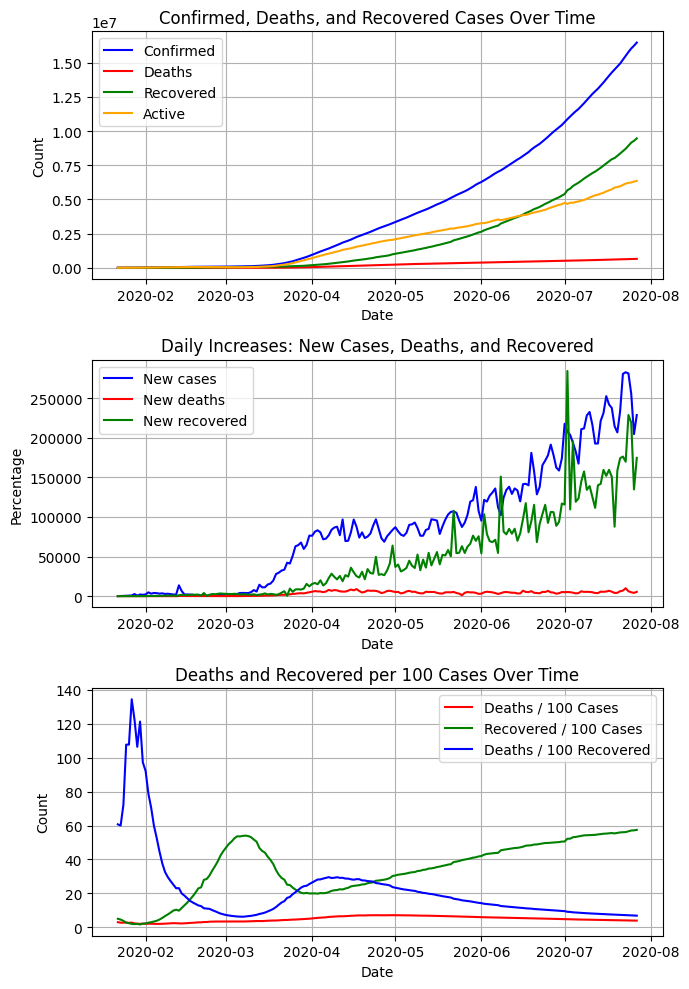

In [ ]:
# Figure setup
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 10))

# Data to plot
data_to_plot = [
    # Confirmed, Deaths, Recovered
    [('Confirmed', 'blue'), ('Deaths', 'red'), ('Recovered', 'green'), ('Active', "orange")],

    # New Cases, New Deaths, New Recovered
    [('New cases', 'blue'), ('New deaths', 'red'), ('New recovered', 'green')],

    # Ratios
    [('Deaths / 100 Cases', 'red'), ('Recovered / 100 Cases', 'green'), ('Deaths / 100 Recovered', 'blue')]
]

titles = [
    'Confirmed, Deaths, and Recovered Cases Over Time',
    'Daily Increases: New Cases, Deaths, and Recovered',
    'Deaths and Recovered per 100 Cases Over Time'
]

for ax, data, title in zip(axes, data_to_plot, titles):
    for metric, color in data:
        ax.plot(data_day_wise['Date'], data_day_wise[metric], label=metric, color=color)
    ax.set_xlabel('Date')
    ax.set_ylabel('Count' if "Daily" not in title else 'Percentage')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


## Covid-19 Confirmed Cases Top Countries


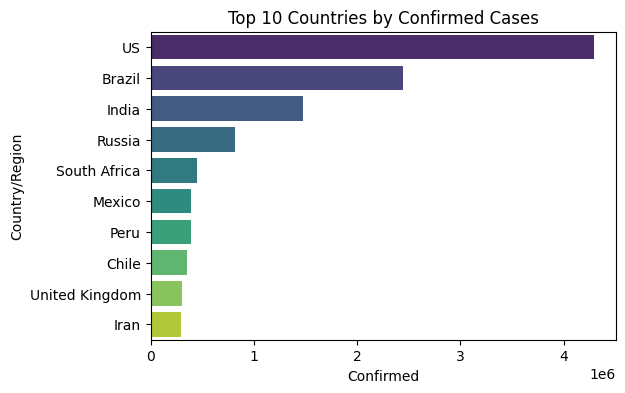

In [ ]:
# Sorting the data by 'Confirmed' cases and taking the top 10
top_countries = data_country_wise_latest.sort_values(by='Confirmed', ascending=False).head(10)
# Convert the 'Country/Region' column to string type
top_countries['Country/Region'] = top_countries['Country/Region'].astype(str)

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Confirmed Cases')
plt.show()


# Geospatial Visualizations

## data transformation for mapping

In [ ]:
def get_iso_code(country_name):
    try:
        # Return the ISO Alpha-3 code for a given country name
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        # If the country name is not found, return None
        return None

# Apply the function to the 'Country/Region' column and create a new 'ISO_Code' column
data_country_wise_latest['ISO_Code'] = data_country_wise_latest['Country/Region'].apply(get_iso_code)

# Check for countries for which the code could not be determined
missing_codes = data_country_wise_latest[data_country_wise_latest['ISO_Code'].isnull()]['Country/Region'].unique()
print("Missing ISO codes for:", missing_codes)


Missing ISO codes for: ['Brunei', 'Burma', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Cote d'Ivoire', ..., 'Laos', 'Russia', 'Syria', 'Taiwan*', 'West Bank and Gaza']
Length: 13
Categories (187, object): ['Afghanistan', 'Albania', 'Algeria', 'Andorra', ..., 'Western Sahara',
                           'Yemen', 'Zambia', 'Zimbabwe']


In [ ]:
country_corrections = {
    'Brunei': 'Brunei Darussalam',
    'Burma': 'Myanmar',
    'Holy See':'Holy See (Vatican City State)',
    'Congo (Brazzaville)':'Republic of the Congo',
    'Congo (Kinshasa)': 'Congo, The Democratic Republic of the',
    "Cote d'Ivoire":"Côte d'Ivoire",
    'Iran':'Islamic Republic of Iran',
    'Laos':"Lao People's Democratic Republic",
    #'Kosovo':'Kosovo'
    "Russia":"Russian Federation",
    "West Bank and Gaza":"the State of Palestine",
    "Syria":"Syrian Arab Republic"
    # ... any other country name mismatches you identify ...
}

# Apply the corrections
data_country_wise_latest['Country/Region'] = data_country_wise_latest['Country/Region'].replace(country_corrections)

# Now you can again try to fetch the ISO codes as demonstrated previously
data_country_wise_latest['ISO_Code'] = data_country_wise_latest['Country/Region'].apply(get_iso_code)

# Check for countries for which the code could not be determined
missing_codes = data_country_wise_latest[data_country_wise_latest['ISO_Code'].isnull()]['Country/Region'].unique()
print("Missing ISO codes for:", missing_codes)

Missing ISO codes for: ['Kosovo', 'Taiwan*']
Categories (187, object): ['Afghanistan', 'Albania', 'Algeria', 'Andorra', ..., 'Western Sahara',
                           'Yemen', 'Zambia', 'Zimbabwe']


In [ ]:
def get_iso_code(country_name):
    try:
        # Return the ISO Alpha-3 code for a given country name
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        # If the country name is not found, return None
        return None

# Apply the function to the 'Country/Region' column and create a new 'ISO_Code' column
data_country_wise_latest['ISO_Code'] = data_country_wise_latest['Country/Region'].apply(get_iso_code)

# Check for countries for which the code could not be determined
missing_codes = data_country_wise_latest[data_country_wise_latest['ISO_Code'].isnull()]['Country/Region'].unique()
print("Missing ISO codes for:", missing_codes)


Missing ISO codes for: ['Kosovo', 'Taiwan*']
Categories (187, object): ['Afghanistan', 'Albania', 'Algeria', 'Andorra', ..., 'Western Sahara',
                           'Yemen', 'Zambia', 'Zimbabwe']


In [ ]:
data_country_wise_latest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Country/Region          187 non-null    category
 1   Confirmed               187 non-null    int64   
 2   Deaths                  187 non-null    int64   
 3   Recovered               187 non-null    int64   
 4   Active                  187 non-null    int64   
 5   New cases               187 non-null    int64   
 6   New deaths              187 non-null    int64   
 7   New recovered           187 non-null    int64   
 8   Deaths / 100 Cases      187 non-null    float64 
 9   Recovered / 100 Cases   187 non-null    float64 
 10  Deaths / 100 Recovered  187 non-null    float64 
 11  Confirmed last week     187 non-null    int64   
 12  1 week change           187 non-null    int64   
 13  1 week % increase       187 non-null    float64 
 14  WHO Region              18

## Confirmed Cases

### original data

In [ ]:
import plotly.express as px

fig = px.choropleth(data_country_wise_latest,
                    locations="ISO_Code",
                    color="Confirmed",
                    hover_name="Country/Region",
                    color_continuous_scale=px.colors.sequential.OrRd,
                    title="Confirmed Cases Worldwide")
fig.update_layout(height=400, width=600, margin={"r":0,"t":40,"l":20,"b":0})
fig.show()


### Log-scaled

In [ ]:
import plotly.express as px
import numpy as np

# Convert negative infinite values (resulting from log(0)) to 0
data_country_wise_latest['Log_Confirmed'] = np.log(data_country_wise_latest['Confirmed']).replace(-np.inf, 0)

fig = px.choropleth(data_country_wise_latest,
                    locations="ISO_Code",
                    color="Log_Confirmed",  # Use logarithmic values for color
                    hover_name="Country/Region",
                    hover_data=["Confirmed"],  # Display actual confirmed cases in hover data
                    color_continuous_scale=px.colors.sequential.OrRd,
                    title="Log-Scaled Confirmed Cases Worldwide")

# Adjusting the layout to improve appearance
fig.update_layout(
    height=500,
    width=750,
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()


### Low-high seperation

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the threshold
threshold = 1000000  # Example threshold

# Splitting datasets
high_cases_df = data_country_wise_latest[data_country_wise_latest['Confirmed'] > threshold]
low_cases_df = data_country_wise_latest[data_country_wise_latest['Confirmed'] <= threshold]

# Creating choropleth maps
trace_high = go.Choropleth(
    locations=high_cases_df['ISO_Code'],
    z=high_cases_df['Confirmed'],
    colorscale='Reds',
    name='High Confirmed cases',
    colorbar=dict(thickness=15, len=0.5, x=0.45)
)

trace_low = go.Choropleth(
    locations=low_cases_df['ISO_Code'],
    z=low_cases_df['Confirmed'],
    colorscale='Blues',
    name='Low Confirmed cases',
    colorbar=dict(thickness=15, len=0.5, x=1)
)

# Creating a subplot with geo subplot type
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('High Confirmed Cases', 'Low Confirmed Cases'),
    column_widths=[0.5, 0.5],
    specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}]]
)

# Adding the choropleth maps to the subplot
fig.add_trace(trace_high, 1, 1)
fig.add_trace(trace_low, 1, 2)

# Updating the layout, geo properties, and reducing the gap
fig.update_layout(
    height=450,
    width=800,
    margin={"r":0,"t":0,"l":10,"b":0}
)
fig.update_geos(projection_type="mercator")

# Adjusting the title properties for a reduced gap
for annotation in fig['layout']['annotations']:
    annotation['yanchor']='bottom'
    annotation['y']=0.9

fig.show()


## Total Deaths




In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the threshold
threshold = 40000  # Example threshold

# Splitting datasets
high_cases_df = data_country_wise_latest[data_country_wise_latest['Deaths'] > threshold]
low_cases_df = data_country_wise_latest[data_country_wise_latest['Deaths'] <= threshold]

# Creating choropleth maps
trace_high = go.Choropleth(
    locations=high_cases_df['ISO_Code'],
    z=high_cases_df['Deaths'],
    colorscale='Reds',
    name='High cases',
    colorbar=dict(thickness=15, len=0.5, x=0.45)
)

trace_low = go.Choropleth(
    locations=low_cases_df['ISO_Code'],
    z=low_cases_df['Deaths'],
    colorscale='Blues',
    name='Low cases',
    colorbar=dict(thickness=15, len=0.5, x=1)
)

# Creating a subplot with geo subplot type
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('High Deaths', 'Low Deaths'),
    column_widths=[0.5, 0.5],
    specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}]]
)

# Adding the choropleth maps to the subplot
fig.add_trace(trace_high, 1, 1)
fig.add_trace(trace_low, 1, 2)

# Updating the layout, geo properties, and reducing the gap
fig.update_layout(
    height=450,
    width=800,
    margin={"r":0,"t":0,"l":10,"b":0}
)
fig.update_geos(projection_type="mercator")

# Adjusting the title properties for a reduced gap
for annotation in fig['layout']['annotations']:
    annotation['yanchor']='bottom'
    annotation['y']=0.9

fig.show()


## Deaths/100 cases

In [ ]:
# Define the threshold
threshold = 10  # Example threshold

# Splitting datasets
high_cases_df = data_country_wise_latest[data_country_wise_latest['Deaths / 100 Cases'] > threshold]
low_cases_df = data_country_wise_latest[data_country_wise_latest['Deaths / 100 Cases'] <= threshold]

# Creating choropleth maps
trace_high = go.Choropleth(
    locations=high_cases_df['ISO_Code'],
    z=high_cases_df['Deaths / 100 Cases'],
    colorscale='Reds',
    name='High Death/100 Cases',
    colorbar=dict(thickness=15, len=0.5, x=0.45)
)

trace_low = go.Choropleth(
    locations=low_cases_df['ISO_Code'],
    z=low_cases_df['Deaths / 100 Cases'],
    colorscale='Blues',
    name='Low Death/100 Cases',
    colorbar=dict(thickness=15, len=0.5, x=1)
)

# Creating a subplot with geo subplot type
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('High Deaths / 100 Cases', 'Low Deaths / 100 Cases'),
    column_widths=[0.5, 0.5],
    specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}]]
)

# Adding the choropleth maps to the subplot
fig.add_trace(trace_high, 1, 1)
fig.add_trace(trace_low, 1, 2)

# Updating the layout, geo properties, and reducing the gap
fig.update_layout(
    height=450,
    width=800,
    margin={"r":0,"t":0,"l":10,"b":0}
)
fig.update_geos(projection_type="mercator")

# Adjusting the title properties for a reduced gap
for annotation in fig['layout']['annotations']:
    annotation['yanchor']='bottom'
    annotation['y']=0.9

fig.show()


## Recovered/100 cases

In [ ]:
# Define the threshold
threshold = 40  # Example threshold

# Splitting datasets
high_cases_df = data_country_wise_latest[data_country_wise_latest['Recovered / 100 Cases'] <= threshold]
low_cases_df = data_country_wise_latest[data_country_wise_latest['Recovered / 100 Cases'] > threshold]

# Creating choropleth maps
trace_high = go.Choropleth(
    locations=high_cases_df['ISO_Code'],
    z=high_cases_df['Recovered / 100 Cases'],
    colorscale='Reds',
    name='Low Recovered / 100 Cases',
    colorbar=dict(thickness=15, len=0.5, x=0.45)
)

trace_low = go.Choropleth(
    locations=low_cases_df['ISO_Code'],
    z=low_cases_df['Recovered / 100 Cases'],
    colorscale='Blues',
    name='High Recovered / 100 Cases',
    colorbar=dict(thickness=15, len=0.5, x=1)
)

# Creating a subplot with geo subplot type
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Low Recovered / 100 Cases', 'High Recovered / 100 Cases'),
    column_widths=[0.5, 0.5],
    specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}]]
)

# Adding the choropleth maps to the subplot
fig.add_trace(trace_high, 1, 1)
fig.add_trace(trace_low, 1, 2)

# Updating the layout, geo properties, and reducing the gap
fig.update_layout(
    height=450,
    width=800,
    margin={"r":0,"t":0,"l":10,"b":0}
)
fig.update_geos(projection_type="mercator")

# Adjusting the title properties for a reduced gap
for annotation in fig['layout']['annotations']:
    annotation['yanchor']='bottom'
    annotation['y']=0.9

fig.show()
